# Proyecto Regresión Logística

El objetivo de este proyecto es desarrollar un modelo de clasificación que prediga si un cliente contratará un depósito a largo plazo, permitiendo al banco optimizar sus campañas de marketing.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [27]:
# CARGA DE DATOS
url = "https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=';')

print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
# INFO GENERAL DEL DATASET
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [29]:
# VERIFICACION DE NULOS
print("Valores nulos por columna:")
print(df.isnull().sum())

# VERIFICACION DE DUPLICADOS
print(f"Filas duplicadas: {df.duplicated().sum()}")

Valores nulos por columna:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Filas duplicadas: 12


Se detectan 12 filas duplicadas. La eliminamos para evitar sesgos en el modelo.

In [30]:
# ELIMINACIÓN DE DUPLICADOS
df = df.drop_duplicates()
print(f"Dataset después de eliminar duplicados: {df.shape}")

Dataset después de eliminar duplicados: (41176, 21)


In [31]:
# ESTADÍSTICAS DESCRIPTIVAS
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Distribución de la variable objetivo (y):
y
no     36537
yes     4639
Name: count, dtype: int64
Proporción: y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64


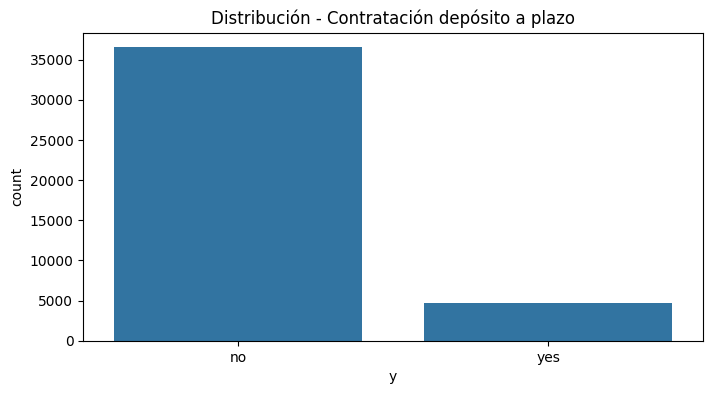

In [32]:
# DISTRIBUCIÓN DE LA VARIABLE OBJETIVO
print("Distribución de la variable objetivo (y):")
print(df['y'].value_counts())
print(f"Proporción: {df['y'].value_counts(normalize=True)}")

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='y')
plt.title('Distribución - Contratación depósito a plazo')
plt.show()

Se observa un desbalance significativo en la variable objetivo, con aproximadamente 88% de "no" y 12% de "sí". Esto deberá considerarse en el modelado

In [33]:
# ANALISIS DE OUTLIERS CON ESTADISTICAS
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Análisis de outliers en variables numéricas:")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

Análisis de outliers en variables numéricas:
age: 468 outliers (1.14%)
duration: 2963 outliers (7.20%)
campaign: 2406 outliers (5.84%)
pdays: 1515 outliers (3.68%)
previous: 5625 outliers (13.66%)
emp.var.rate: 0 outliers (0.00%)
cons.price.idx: 0 outliers (0.00%)
cons.conf.idx: 446 outliers (1.08%)
euribor3m: 0 outliers (0.00%)
nr.employed: 0 outliers (0.00%)


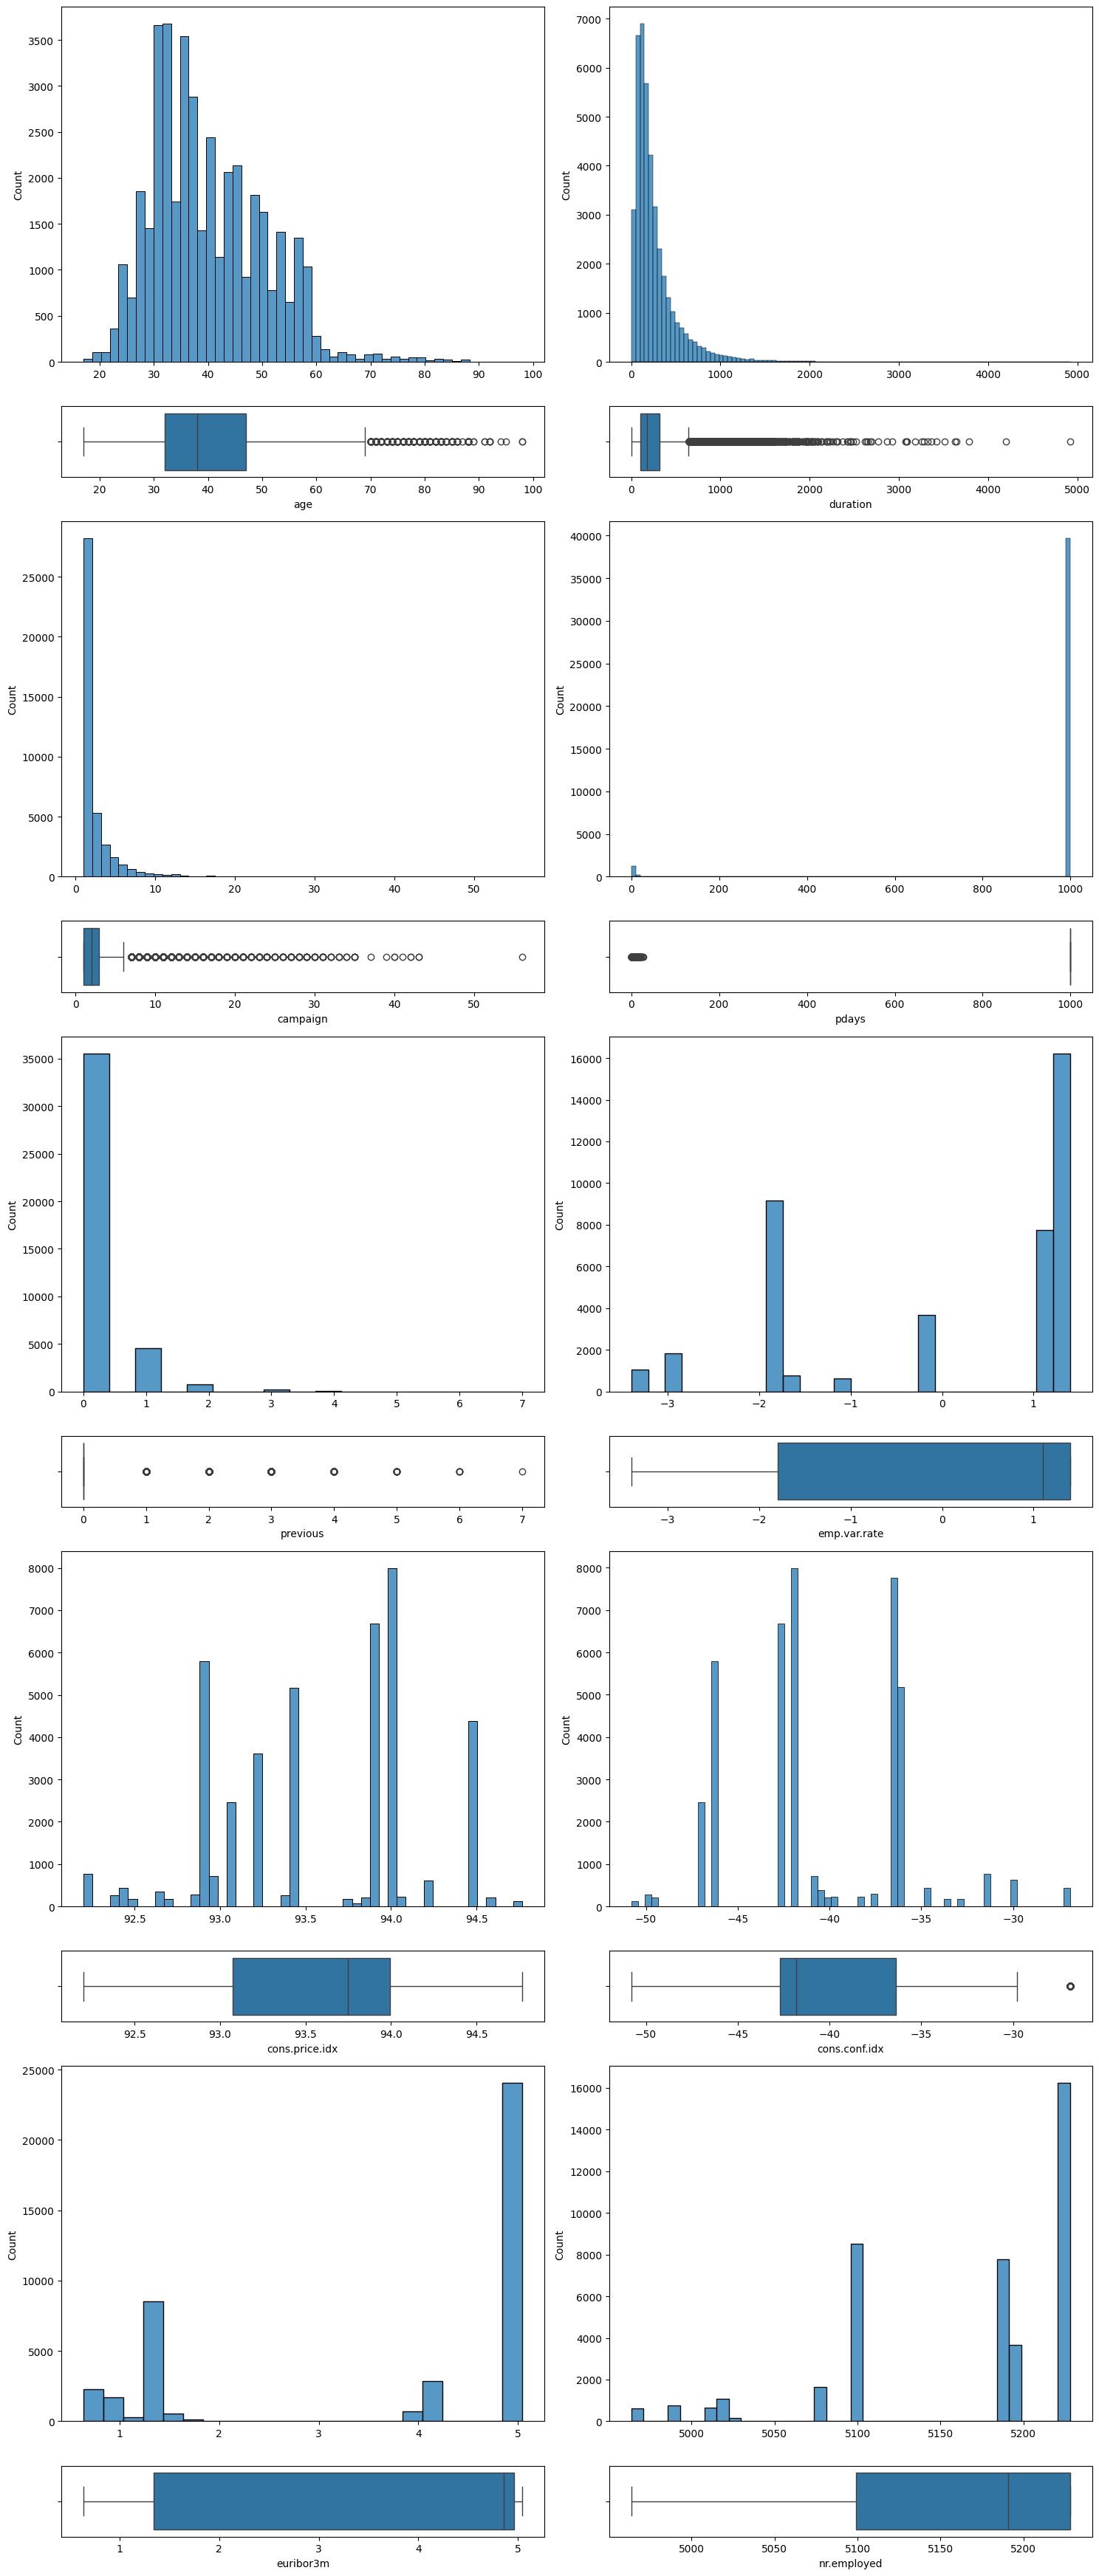

In [34]:
# DISTRIBUCIÓN Y OUTLIERS DE VARIABLES NUMÉRICAS
fig, axis = plt.subplots(10, 2, figsize=(15, 35), gridspec_kw={'height_ratios': [5, 1, 5, 1, 5, 1, 5, 1, 5, 1]})

sns.histplot(ax=axis[0, 0], data=df, x="age", bins=50).set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="age")

sns.histplot(ax=axis[0, 1], data=df, x="duration", bins=100).set(xlabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="duration")

sns.histplot(ax=axis[2, 0], data=df, x="campaign", bins=50).set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x="campaign")

sns.histplot(ax=axis[2, 1], data=df, x="pdays", bins=100).set(xlabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x="pdays")

sns.histplot(ax=axis[4, 0], data=df, x="previous").set(xlabel=None)
sns.boxplot(ax=axis[5, 0], data=df, x="previous")

sns.histplot(ax=axis[4, 1], data=df, x="emp.var.rate").set(xlabel=None)
sns.boxplot(ax=axis[5, 1], data=df, x="emp.var.rate")

sns.histplot(ax=axis[6, 0], data=df, x="cons.price.idx").set(xlabel=None)
sns.boxplot(ax=axis[7, 0], data=df, x="cons.price.idx")

sns.histplot(ax=axis[6, 1], data=df, x="cons.conf.idx").set(xlabel=None)
sns.boxplot(ax=axis[7, 1], data=df, x="cons.conf.idx")

sns.histplot(ax=axis[8, 0], data=df, x="euribor3m").set(xlabel=None)
sns.boxplot(ax=axis[9, 0], data=df, x="euribor3m")

sns.histplot(ax=axis[8, 1], data=df, x="nr.employed").set(xlabel=None)
sns.boxplot(ax=axis[9, 1], data=df, x="nr.employed")

plt.tight_layout()
plt.show()

**Análisis de outliers:** Se detectaron valores extremos en varias variables, principalmente en 'duration' y 'campaign' debido a la naturaleza asimétrica (no tienen distribución de campana) de los datos de marketing. Sin embargo, tras revisar el contexto del negocio, estos outliers representan comportamientos reales: duraciones largas indican conversaciones exitosas, y múltiples contactos reflejan clientes más difíciles de convencer. Por tanto, decidimos mantener todos los outliers ya que no corresponden a errores de medición sino a casos válidos dentro de la operación bancaria.

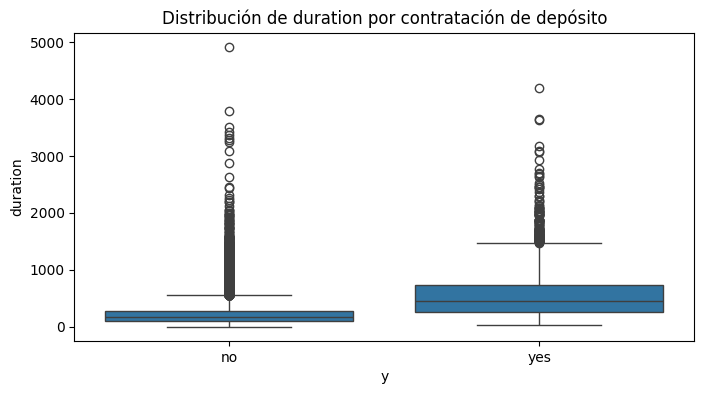

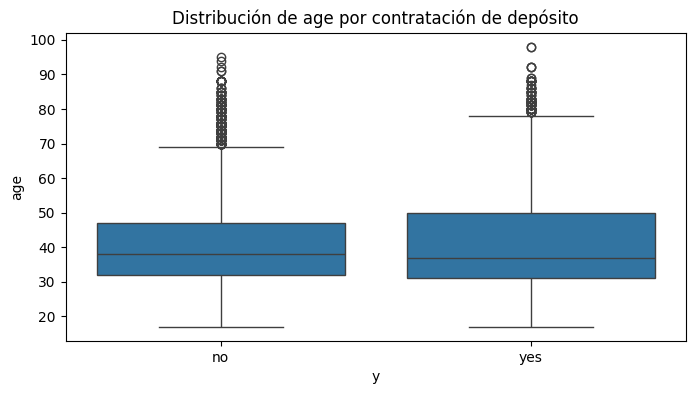

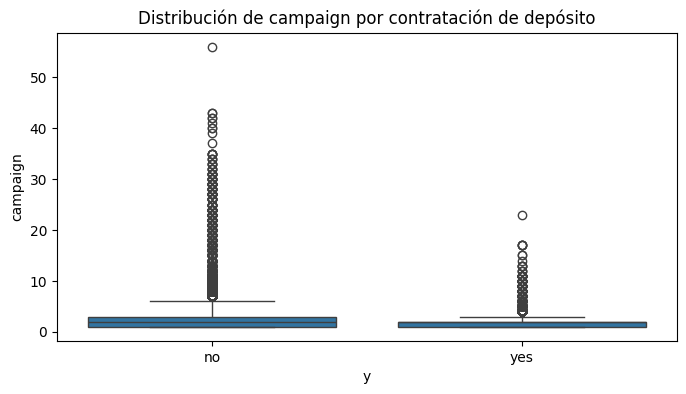

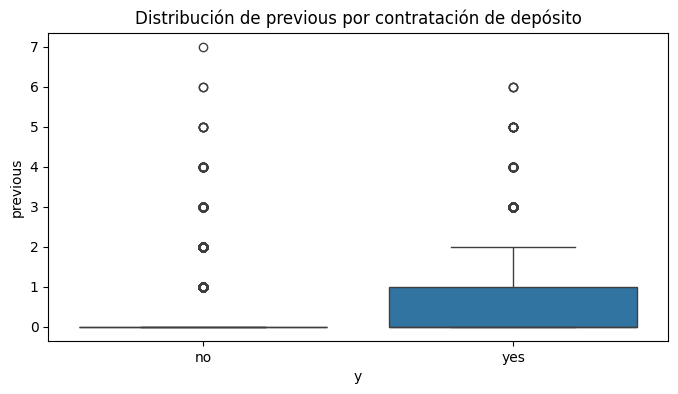

In [35]:
# RELACIÓN VARIABLES CLAVE VS TARGET
variables_clave = ['duration', 'age', 'campaign', 'previous']

for col in variables_clave:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='y', y=col)
    plt.title(f'Distribución de {col} por contratación de depósito')
    plt.show()

**Relación variables vs target:**
Analizamos individualmente las variables más relevantes. 'duration' muestra clara diferencia: conversaciones más largas están asociadas a mayor probabilidad de suscripción.

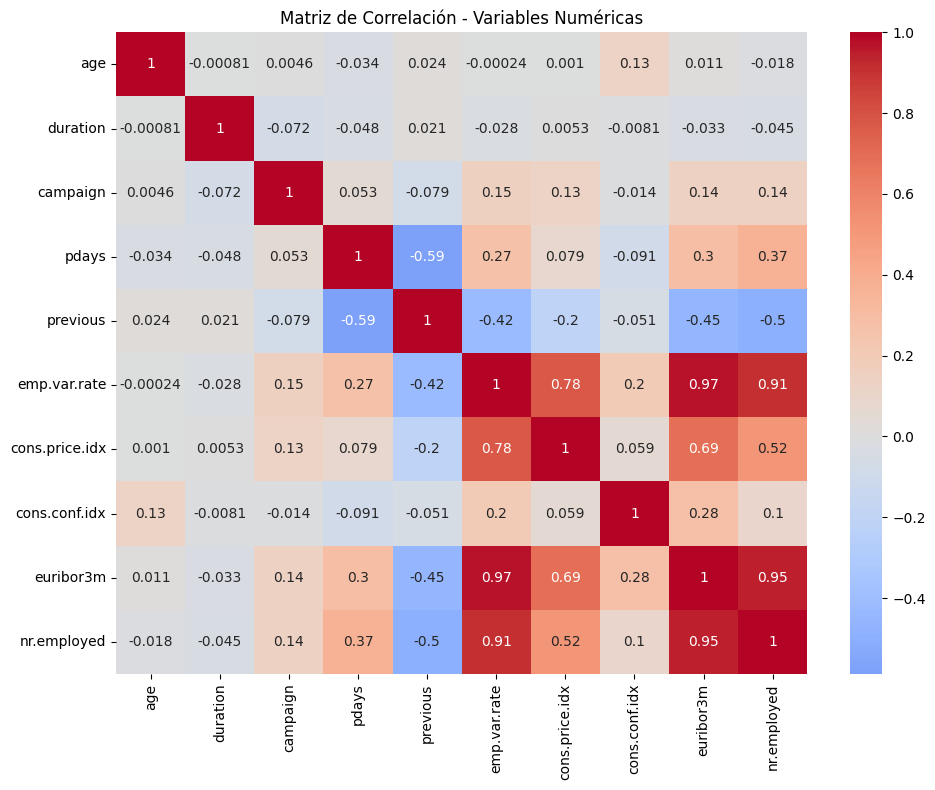

In [36]:
# MATRIZ DE CORRELACIÓN
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

**Análisis de correlaciones:**
Se observan altas correlaciones entre las variables macroeconómicas (emp.var.rate, euribor3m, nr.employed), lo que es esperable. 'duration' muestra correlación moderada con el target, siendo una variable predictiva importante.

<Figure size 1000x500 with 0 Axes>

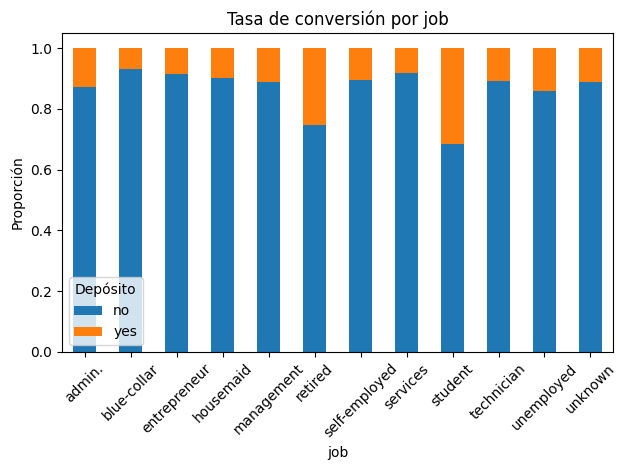

<Figure size 1000x500 with 0 Axes>

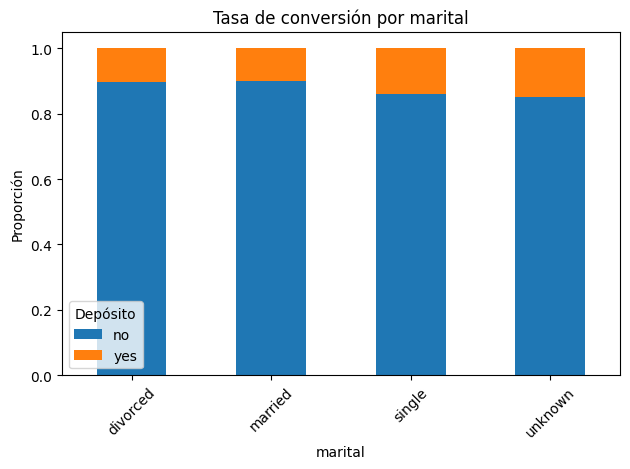

<Figure size 1000x500 with 0 Axes>

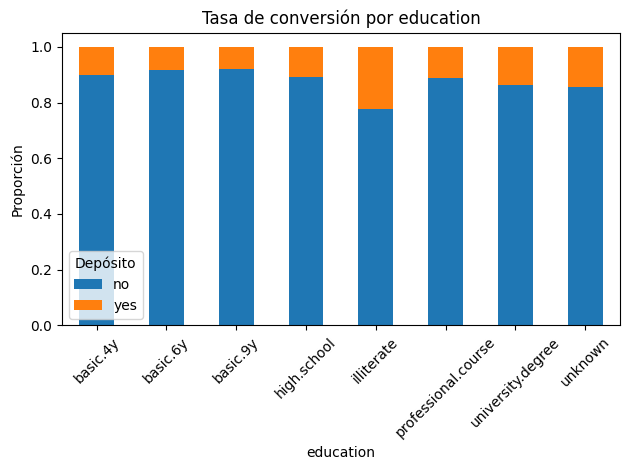

<Figure size 1000x500 with 0 Axes>

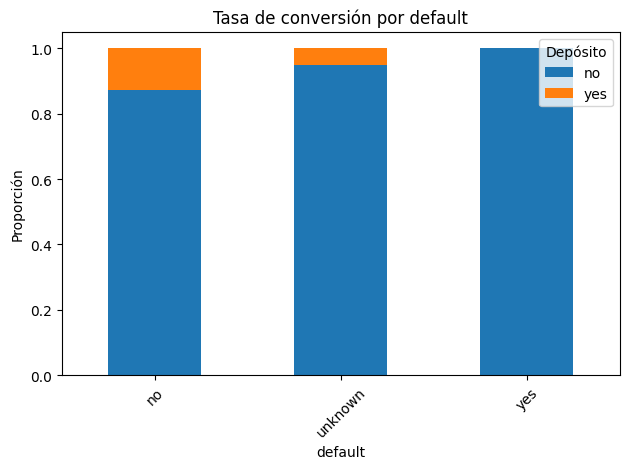

<Figure size 1000x500 with 0 Axes>

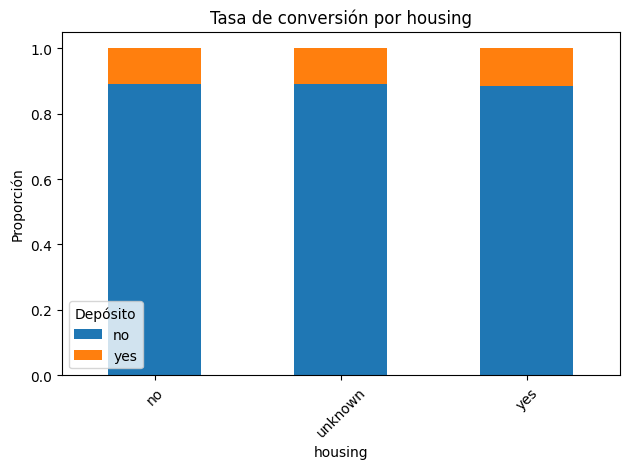

<Figure size 1000x500 with 0 Axes>

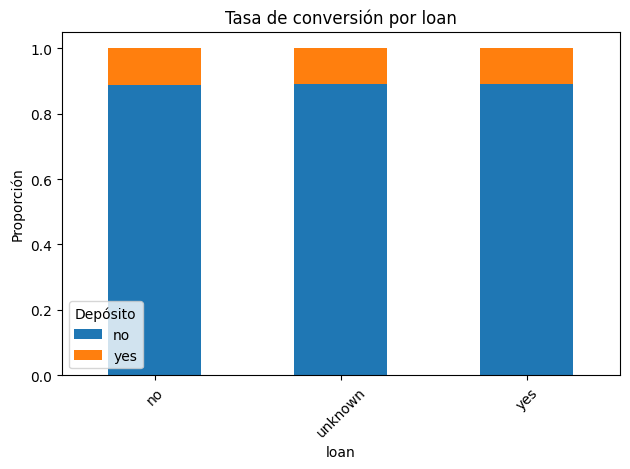

<Figure size 1000x500 with 0 Axes>

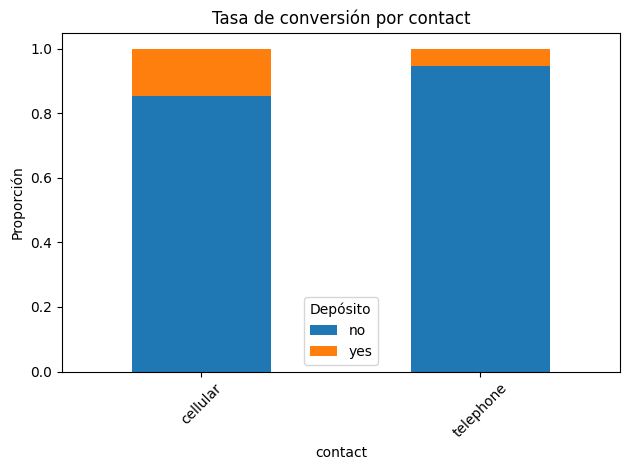

<Figure size 1000x500 with 0 Axes>

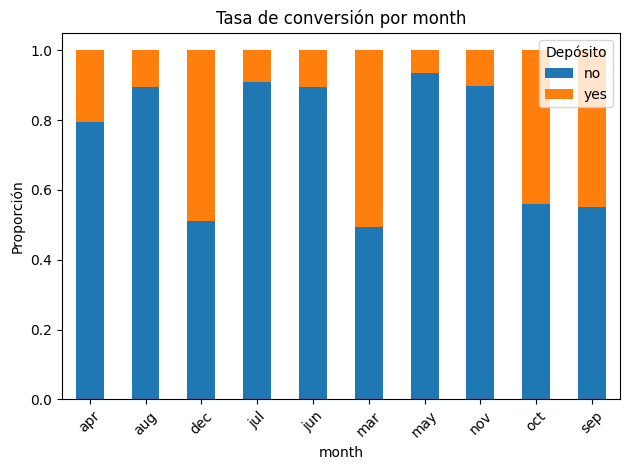

<Figure size 1000x500 with 0 Axes>

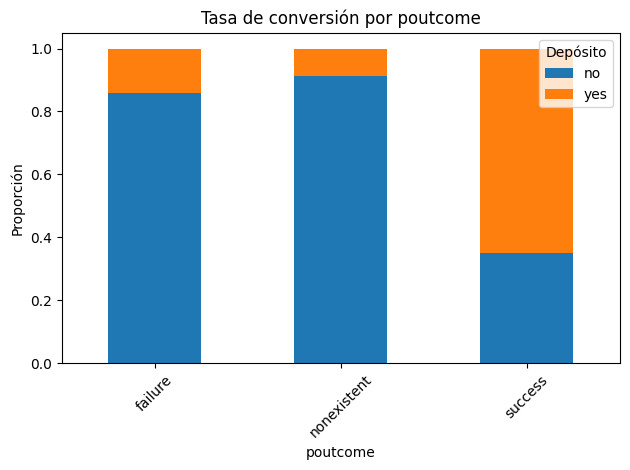

In [37]:
# ANÁLISIS DE VARIABLES CATEGÓRICAS VS TARGET
categoricas_importantes = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categoricas_importantes:
    plt.figure(figsize=(10, 5))
    pd.crosstab(df[col], df['y'], normalize='index').plot(kind='bar', stacked=True)
    plt.title(f'Tasa de conversión por {col}')
    plt.ylabel('Proporción')
    plt.legend(title='Depósito')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Relación categóricas vs target:**
Variables como 'poutcome' (resultado anterior) y 'contact' muestran patrones claros. Los clientes con éxito previo ('poutcome' = success) tienen mayor tasa de conversión.

In [38]:
# PREPROCESAMIENTO - CODIFICACIÓN DE VARIABLES CATEGÓRICAS
df_processed = df.copy()

# Eliminamos day_of_week primero
df_processed = df_processed.drop('day_of_week', axis=1)

# Codificación binaria para variables sí/no
df_processed['default'] = df_processed['default'].map({'no': 0, 'yes': 1, 'unknown': 0})
df_processed['housing'] = df_processed['housing'].map({'no': 0, 'yes': 1})
df_processed['loan'] = df_processed['loan'].map({'no': 0, 'yes': 1})
df_processed['y'] = df_processed['y'].map({'no': 0, 'yes': 1})

# One-hot encoding para categóricas con múltiples categorías
categoricas_onehot = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
df_processed = pd.get_dummies(df_processed, columns=categoricas_onehot, prefix=categoricas_onehot)

print(f"Dataset procesado: {df_processed.shape}")
print(f"Variables finales: {len(df_processed.columns)}")
df_processed.head()

Dataset procesado: (41176, 53)
Variables finales: 53


,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,0.0,0.0,261,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,False,True,False
1,57,0,0.0,0.0,149,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,False,True,False
2,37,0,1.0,0.0,226,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,False,True,False
3,40,0,0.0,0.0,151,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,False,True,False
4,56,0,0.0,1.0,307,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,False,True,False


**Preprocesamiento completado:**
- Variables binarias ('default', 'housing', 'loan', 'y') codificadas como 0/1
- Variable 'default' con categoría 'unknown' mapeada como 0 (sin crédito en mora)
- Variables categóricas con one-hot encoding aplicado
- Dataset listo para modelado con 63 variables predictoras
- Eliminamos la variable Day of the week, pues no aporta mucha informacion y nos complica el modelo mas adelante

In [39]:
# DIVISIÓN EN FEATURES Y TARGET
X = df_processed.drop('y', axis=1)
y = df_processed['y']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")
print(f"Proporción target - Sí: {y.mean():.3f}, No: {1-y.mean():.3f}")

Features: (41176, 52)
Target: (41176,)
Proporción target - Sí: 0.113, No: 0.887


In [40]:
# DIVISIÓN TRAIN/TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")
print(f"Proporción train - Sí: {y_train.mean():.3f}")
print(f"Proporción test - Sí: {y_test.mean():.3f}")

Train: (32940, 52)
Test: (8236, 52)
Proporción train - Sí: 0.113
Proporción test - Sí: 0.113


**División de datos:**
- Dataset dividido 80/20 manteniendo la proporción del target en ambos conjuntos
- Balance de clases conservado (≈12% sí, 88% no)

In [41]:
# ESCALADO DE VARIABLES NUMÉRICAS
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
print("Variables numéricas a escalar:")
print(list(numeric_cols))

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Escalado completado")
print(f"Train escalado: {X_train_scaled.shape}")
print(f"Test escalado: {X_test_scaled.shape}")

Variables numéricas a escalar:
['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Escalado completado
Train escalado: (32940, 52)
Test escalado: (8236, 52)


In [42]:
# VERIFICACIÓN FINAL ANTES DEL MODELO
print("Tipos de datos en X_train_scaled:")
print(X_train_scaled.dtypes.value_counts())

print("\nVerificación de que no hay strings:")
string_cols = X_train_scaled.select_dtypes(include=['object']).columns
print(f"Columnas con strings: {len(string_cols)}")
print(string_cols)

Tipos de datos en X_train_scaled:
bool       39
float64    13
Name: count, dtype: int64

Verificación de que no hay strings:
Columnas con strings: 0
Index([], dtype='object')


**Preparación completada:**
- Datos divididos 80/20 manteniendo balance de clases
- Variables numéricas escaladas
- Verificación de que no quedan variables categóricas sin codificar

In [43]:
# VERIFICACIÓN DE NULOS EN LOS DATOS ESCALADOS
print("Valores nulos en X_train_scaled:")
print(X_train_scaled.isnull().sum().sum())

print("\nValores nulos en X_test_scaled:")
print(X_test_scaled.isnull().sum().sum())

print("\nValores nulos en y_train:")
print(y_train.isnull().sum())

print("\nValores nulos en y_test:")
print(y_test.isnull().sum())

Valores nulos en X_train_scaled:
1558

Valores nulos en X_test_scaled:
422

Valores nulos en y_train:
0

Valores nulos en y_test:
0


In [44]:
# IDENTIFICAMOS DÓNDE ESTÁN LOS NULOS
null_cols_train = X_train_scaled.columns[X_train_scaled.isnull().any()].tolist()
null_cols_test = X_test_scaled.columns[X_test_scaled.isnull().any()].tolist()

print("Columnas con nulos en train:", null_cols_train)
print("Columnas con nulos en test:", null_cols_test)

Columnas con nulos en train: ['housing', 'loan']
Columnas con nulos en test: ['housing', 'loan']


In [45]:
# ELIMINAMOS FILAS CON NULOS O IMPUTAMOS
X_train_clean = X_train_scaled.dropna()
y_train_clean = y_train.loc[X_train_clean.index]

X_test_clean = X_test_scaled.dropna()
y_test_clean = y_test.loc[X_test_clean.index]

print(f"Train después de eliminar nulos: {X_train_clean.shape}")
print(f"Test después de eliminar nulos: {X_test_clean.shape}")

Train después de eliminar nulos: (32161, 52)
Test después de eliminar nulos: (8025, 52)


In [46]:
# ENTRENAMOS CON DATOS LIMPIOS
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_clean, y_train_clean)

# PREDICCIONES
y_pred_train = model.predict(X_train_clean)
y_pred_test = model.predict(X_test_clean)

y_pred_proba_train = model.predict_proba(X_train_clean)[:, 1]
y_pred_proba_test = model.predict_proba(X_test_clean)[:, 1]

In [47]:
# EVALUACIÓN DEL MODELO
def evaluate_classification_model(y_true, y_pred, y_proba, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    
    print(f"\n{dataset_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (1): {report['1']['precision']:.4f}")
    print(f"Recall (1): {report['1']['recall']:.4f}")
    print(f"F1-Score (1): {report['1']['f1-score']:.4f}")
    print(f"Matriz de confusión:")
    print(cm)
    
    return accuracy, cm, report

print("EVALUACIÓN MODELO BASE")
train_acc, train_cm, train_report = evaluate_classification_model(y_train_clean, y_pred_train, y_pred_proba_train, "TRAIN")
test_acc, test_cm, test_report = evaluate_classification_model(y_test_clean, y_pred_test, y_pred_proba_test, "TEST")

EVALUACIÓN MODELO BASE

TRAIN:
Accuracy: 0.9114
Precision (1): 0.6665
Recall (1): 0.4262
F1-Score (1): 0.5200
Matriz de confusión:
[[27769   772]
 [ 2077  1543]]

TEST:
Accuracy: 0.9085
Precision (1): 0.6545
Recall (1): 0.4134
F1-Score (1): 0.5067
Matriz de confusión:
[[6914  199]
 [ 535  377]]


**Modelo base evaluado:**
Primeros resultados obtenidos. Analizamos el desempeño del modelo para identificar áreas de mejora.

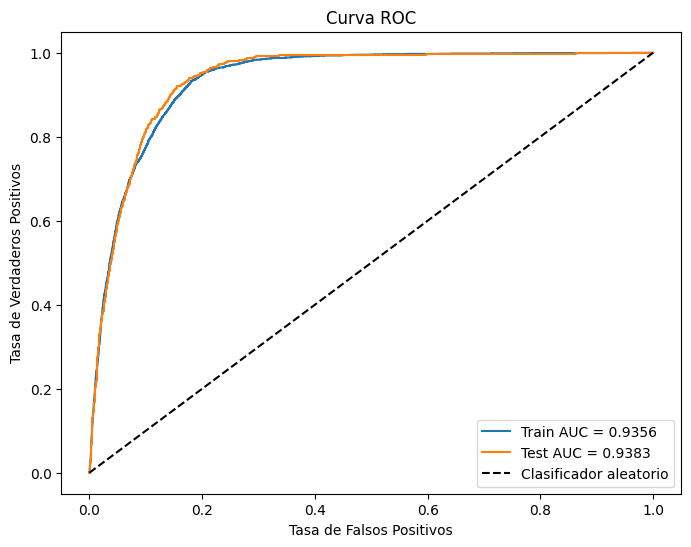

In [48]:
# CURVA ROC Y AUC
fpr_train, tpr_train, _ = roc_curve(y_train_clean, y_pred_proba_train)
fpr_test, tpr_test, _ = roc_curve(y_test_clean, y_pred_proba_test)
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.4f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [49]:
# IMPORTANCIA DE VARIABLES
importance = pd.DataFrame({
    'feature': X_train_clean.columns,
    'coefficient': model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print("Top 10 variables más importantes:")
print(importance.head(10))

Top 10 variables más importantes:
              feature  coefficient
8        emp.var.rate    -2.650078
44          month_mar     1.615097
4            duration     1.223041
9      cons.price.idx     1.166357
38  contact_telephone    -0.828067
45          month_may    -0.814568
43          month_jun    -0.793361
46          month_nov    -0.787593
49   poutcome_failure    -0.780148
11          euribor3m     0.692149


**¿Qué estamos viendo en estos resultados?**

**Problema:** Nuestro dataset está desbalanceado - solo el 12% de clientes contrata el depósito (clase "1"), mientras el 88% no lo hace (clase "0").

**Métrica clave - Accuracy:** Mide el porcentaje total de aciertos, pero puede engañar en datos desbalanceados. Un modelo que siempre prediga "no" tendría 88% de accuracy, pero no serviría para encontrar clientes interesados.

**Otras métricas importantes:**
- **Precision (1):** De los que predijimos como "sí", ¿cuántos realmente dijeron sí?
- **Recall (1):** De los que realmente dijeron "sí", ¿cuántos logramos identificar?
- **F1-Score (1):** Balance entre Precision y Recall para la clase "sí"

In [50]:
# OPTIMIZACIÓN DEL MODELO - BALANCEO DE CLASES
model_balanced = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train_clean, y_train_clean)

# PREDICCIONES MODELO OPTIMIZADO
y_pred_train_bal = model_balanced.predict(X_train_clean)
y_pred_test_bal = model_balanced.predict(X_test_clean)

y_pred_proba_train_bal = model_balanced.predict_proba(X_train_clean)[:, 1]
y_pred_proba_test_bal = model_balanced.predict_proba(X_test_clean)[:, 1]

In [51]:
# EVALUACIÓN MODELO OPTIMIZADO
print("EVALUACIÓN MODELO CON BALANCEO DE CLASES")
train_acc_bal, train_cm_bal, train_report_bal = evaluate_classification_model(y_train_clean, y_pred_train_bal, y_pred_proba_train_bal, "TRAIN")
test_acc_bal, test_cm_bal, test_report_bal = evaluate_classification_model(y_test_clean, y_pred_test_bal, y_pred_proba_test_bal, "TEST")

EVALUACIÓN MODELO CON BALANCEO DE CLASES

TRAIN:
Accuracy: 0.8602
Precision (1): 0.4398
Recall (1): 0.8845
F1-Score (1): 0.5875
Matriz de confusión:
[[24463  4078]
 [  418  3202]]

TEST:
Accuracy: 0.8640
Precision (1): 0.4511
Recall (1): 0.9046
F1-Score (1): 0.6020
Matriz de confusión:
[[6109 1004]
 [  87  825]]


**Optimización aplicada:**
- Modelo con balanceo de clases para manejar el desbalance (12% sí vs 88% no)
- Evaluamos si mejora la detección de la clase minoritaria

In [53]:
# GUARDAR DATOS
df_processed.to_csv('bank_processed.csv', index=False)